In [1]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
re_df=pd.read_csv('Amazon_Reviews.csv')
re_df

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1
...,...,...
194,A Book That Is Worth a Second Look: This book...,1
195,Best game ever: This games makes even amazing...,1
196,Guitar in Absentia: With all due respect to a...,0
197,Stiff and Smells like drying paint: You get w...,0


In [4]:
#word_tokenize('An Apple a day keeps the doctor away.So, will I get sick soon?')
#tokenizer.tokenize('An Apple a day keeps the doctor away.So, will I get sick soon?')

In [33]:
y=re_df['Label']
re_df.drop(columns='Label',inplace=True)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(re_df,y,test_size=0.2,random_state=41)
X_train

,Review
55,Good but received defective book: I bought th...
189,MASK OF FAMILIARITY: MASK MAKER takes us down...
106,Very authentic: This is my first encounter wi...
83,Good book: Well written chronicles of The Far...
198,Review of Pillow: This was a joke. I am sendi...
...,...
65,Profound then. Truly horrible now.: The narra...
80,audio options non existent: While the movie i...
140,I found it! Henry Dog!: I had two Henry Dogs....
163,Excellent product: These Alphabet blocks are ...


In [35]:
tokenizer=RegexpTokenizer(r'\w+')
en_sw=stopwords.words('english')

In [36]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
tfidf=TfidfVectorizer()

#stemmer.stem('cacti')
#lemmatizer.lemmatize('playing',pos='v')

In [37]:
def text_preprocessing(text):
    
    tokens=tokenizer.tokenize(text)
    
    pure_tokens=[token.lower() for token in tokens if token.lower() not in en_sw]
    
    lemmatized_tokens=[lemmatizer.lemmatize(token,pos='v') for token in pure_tokens]
    
    return ' '.join(lemmatized_tokens)

In [38]:
X_train['Review']=X_train['Review'].apply(text_preprocessing)
X_test['Review']=X_test['Review'].apply(text_preprocessing)


In [39]:
train_tfidf=tfidf.fit_transform(X_train['Review'])
test_tfidf=tfidf.transform(X_test['Review'])

In [44]:
mnb=MultinomialNB()
mnb.fit(train_tfidf,y_train)

mnb_pred=mnb.predict(test_tfidf)
pos_probabs=mnb.predict_proba(test_tfidf)[::,1]

pos_probabs

array([0.68429706, 0.64180835, 0.75771481, 0.73154037, 0.77284467,
       0.67152986, 0.53018118, 0.67665671, 0.64681627, 0.74335307,
       0.48767117, 0.4550224 , 0.57649068, 0.35883104, 0.61725539,
       0.65855673, 0.338616  , 0.7358248 , 0.52745454, 0.71976355,
       0.47516323, 0.69674609, 0.62270469, 0.6772726 , 0.67216684,
       0.64015786, 0.52111895, 0.40953367, 0.45729331, 0.68565948,
       0.71626981, 0.61256554, 0.59247891, 0.70819312, 0.73851808,
       0.50957533, 0.64305051, 0.72710008, 0.66971566, 0.6670427 ])

# confucion,recall,f1_Score,precision

In [45]:
confusion_matrix(y_test,mnb_pred)

array([[ 7, 13],
       [ 0, 20]], dtype=int64)

In [46]:
recall_score(y_test,mnb_pred)

1.0

In [47]:
precision_score(y_test,mnb_pred)

0.6060606060606061

In [48]:
f1_score(y_test,mnb_pred)

0.7547169811320755

# ROC_AUC_CURVE

0.7875000000000001

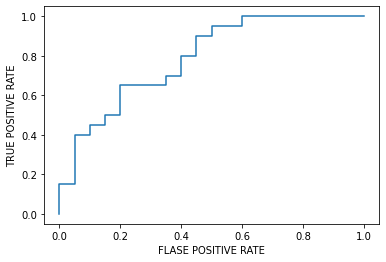

In [54]:
fpr,tpr,threeshold=roc_curve(y_test,pos_probabs)

plt.plot(fpr,tpr)
plt.xlabel('FLASE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')

roc_auc_score(y_test,pos_probabs)

In [55]:
accuracy_score(y_test,mnb_pred)

0.675